In [1]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''
from __future__ import print_function
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad, Adam
from keras.utils import np_utils, generic_utils
from six.moves import range
import numpy as np
import scipy as sp
from keras import backend as K  
import random
random.seed(2001)
import scipy.io
import matplotlib.pyplot as plt
from keras.regularizers import l2, activity_l2
from sklearn import metrics
import glob as glob



/home/charles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/charles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/home/charles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/charles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/charles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning

Using the SGD Optimizer
Using the SGLD Optimizer


/home/charles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/charles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/charles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [103]:
def fetch_data(files, slice_range):
    #randomly pick test_percent of folders
    num = len(files)
    XY_Data = list()
    
    for f in files:
        Xy_tr = np.load(f)
        trimed_data = None
        if slice_range != 0:                    
            num_of_slices = Xy_tr[-1, 785]
            start_slice =np.floor(num_of_slices/2) - np.floor(slice_range/2) 
            end_slice = start_slice + slice_range
            start_indices = Xy_tr[:, 785] >= start_slice
            end_indices = Xy_tr[:, 785] <= end_slice
            intercept = start_indices & end_indices        
            trimed_data = Xy_tr[intercept]
        else:
            trimed_data = Xy_tr        
        if len(XY_Data) == 0:
            XY_Data = trimed_data
        else:
            XY_Data = np.append(XY_Data, trimed_data, axis =0)
    return XY_Data

In [104]:
data_files = '.'
all_files = glob.glob(data_files+'/*.npy')
all_files = all_files[:60]  #load the number of folders indicated in the slice.... loading all will require more memory

In [111]:
XY_Data_All= fetch_data(all_files, 9)

In [112]:
print (XY_Data_All.shape)

(26210, 786)


(1, 552) (1, 25658)


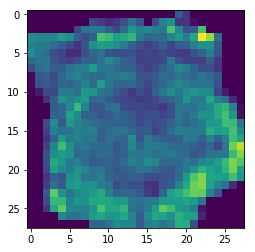

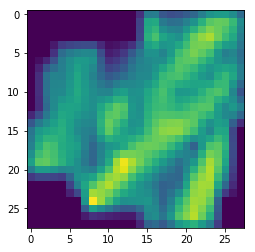

In [121]:
ones = np.where(XY_Data_All[:, 784]==1)
zeros = np.where(XY_Data_All[:, 784]==0)

print(np.shape(ones), np.shape(zeros))

all_ones = XY_Data_All[ones]
all_zeros = XY_Data_All[zeros]
plt.imshow(all_ones[10, :784].reshape(28,28))
plt.figure()
plt.imshow(all_zeros[400, :784].reshape(28,28))
      

In [35]:
try:
    from sklearn.model_selection import train_test_split
except ImportError:
    from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit

/home/charles/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
num_classes = 2
X = XY_Data_All[:, :784]
y = XY_Data_All[:, 784].astype(np.int)

sss = StratifiedShuffleSplit(y, 3, test_size=0.5, random_state=0)
print (sss)
for train_index, test_index in sss:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


# y_train = np_utils.to_categorical(y_train, num_classes)
# y_test = np_utils.to_categorical(y_test, num_classes)

# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)

# # compute quantities required for featurewise normalization
# # (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(x_train)


StratifiedShuffleSplit(labels=[1 0 0 ... 0 0 0], n_iter=3, test_size=0.5, random_state=0)
TRAIN: [26564  4929 17540 ...  9926 46491 46193] TEST: [10951 45135  3508 ... 38665  2564 46631]
TRAIN: [29673 40664  5367 ... 19631  6673  6406] TEST: [18054  4999 45866 ... 36662 22164 45717]
TRAIN: [ 5133 39425 43753 ... 18151 43707  4683] TEST: [18402 20195 46766 ... 15996 44980 25777]
